In [7]:

import os

os.makedirs('/content/csv_files', exist_ok=True)


In [8]:

!pip install --quiet gdown

!gdown --id 1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs -O /content/csv_files/hyperliquid_trades.csv


!gdown --id 1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf -O /content/csv_files/fear_greed.csv


/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/csv_files/hyperliquid_trades.csv
100% 47.5M/47.5M [00:00<00:00, 58.5MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/csv_files/fear_greed.csv
100% 90.8k/90.8k [00:00<00:00, 10.9MB/s]


In [9]:
import pandas as pd
from pathlib import Path


Path('csv_files').mkdir(exist_ok=True)
Path('outputs').mkdir(exist_ok=True)
trades = pd.read_csv('/content/csv_files/hyperliquid_trades.csv', low_memory=False)
sent = pd.read_csv('/content/csv_files/fear_greed.csv', low_memory=False)


print("Trades shape:", trades.shape)
print(trades.columns[:30])
display(trades.head())
print("Sentiment shape:", sent.shape)
display(sent.head())


Trades shape: (211224, 16)
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Sentiment shape: (2644, 4)


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [14]:

missing = trades.isnull().sum().sort_values(ascending=False)
print(missing[missing>0].head(20))


print(trades.dtypes)

trades['time'] = pd.to_datetime(trades['Timestamp IST'], errors='coerce')

print("After parse, null times:", trades['time'].isnull().sum())


for col in ['execution price','size','closedPnL','leverage','start position']:
    if col in trades.columns:
        trades[col] = pd.to_numeric(trades[col], errors='coerce')


display(trades[['Execution Price','Size USD','Closed PnL','Start Position']].describe())



sent.columns = [c.strip() for c in sent.columns]
print(sent.columns)
display(sent.head())

sent['date'] = pd.to_datetime(sent['date'], errors='coerce').dt.date
print("Sentiment date range:", sent['date'].min(), "to", sent['date'].max())


time    131999
dtype: int64
Account                     object
Coin                        object
Execution Price            float64
Size Tokens                float64
Size USD                   float64
Side                        object
Timestamp IST               object
Start Position             float64
Direction                   object
Closed PnL                 float64
Transaction Hash            object
Order ID                     int64
Crossed                       bool
Fee                        float64
Trade ID                   float64
Timestamp                  float64
time                datetime64[ns]
dtype: object
After parse, null times: 131999


,Execution Price,Size USD,Closed PnL,Start Position
count,211224.000000,2.112240e+05,211224.000000,2.112240e+05
mean,11414.723350,5.639451e+03,48.749001,-2.994625e+04
std,29447.654868,3.657514e+04,919.164828,6.738074e+05
min,0.000005,0.000000e+00,-117990.104100,-1.433463e+07
25%,4.854700,1.937900e+02,0.000000,-3.762311e+02
50%,18.280000,5.970450e+02,0.000000,8.472793e+01
75%,101.580000,2.058960e+03,5.792797,9.337278e+03
max,109004.000000,3.921431e+06,135329.090100,3.050948e+07


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


Sentiment date range: 2018-02-01 to 2025-05-02


In [22]:

trades = trades[trades['time'].notnull()].copy()
trades = trades[trades['Size USD'].notnull() & (trades['Size USD'] != 0)]
trades = trades[trades['Start Position'].notnull() & (trades['Start Position'] > 0)]
trades['date'] = trades['time'].dt.date
print(trades[['Size USD','Start Position','Side','date']].head())

   Size USD  Start Position Side        date
1    127.68      986.524596  BUY  2024-02-12
2   1150.63     1002.518996  BUY  2024-02-12
3   1142.04     1146.558564  BUY  2024-02-12
4     69.75     1289.488521  BUY  2024-02-12
5     11.27     1298.215466  BUY  2024-02-12


In [28]:

daily = trades.groupby('date').agg(
    n_trades = ('Account','count'),
    total_volume = ('Size USD','sum'),
    mean_leverage = ('Start Position','mean'),
    total_pnl = ('Closed PnL','sum'),
    mean_pnl = ('Closed PnL','mean'),
    win_rate = ( 'Closed PnL', lambda x: (x>0).sum() / x.count() )
).reset_index()


daily['date'] = pd.to_datetime(daily['date'])
sent['date'] = pd.to_datetime(sent['date'])
merged = pd.merge(daily, sent, left_on='date', right_on='date', how='left')
merged.head()


,date,n_trades,total_volume,mean_leverage,total_pnl,mean_pnl,win_rate,timestamp,value,classification
0,2023-01-05,2,293.47,0.137900,0.000000,0.000000,0.00,1.672897e+09,29.0,Fear
1,2023-05-12,6,23907.10,3.773300,0.000000,0.000000,0.00,1.683869e+09,49.0,Neutral
2,2024-01-01,12,153695.16,622.277167,-411.208522,-34.267377,0.00,1.704087e+09,65.0,Greed
3,2024-01-02,4,1008.16,27844.000000,0.000000,0.000000,0.00,1.704173e+09,71.0,Greed
4,2024-01-03,100,217379.46,515217.284000,6768.721409,67.687214,0.99,1.704260e+09,70.0,Greed


In [30]:

comp = merged.groupby('classification').agg({
    'n_trades':'mean',
    'total_volume':'mean',
    'mean_leverage':'mean',
    'total_pnl':'mean',
    'win_rate':'mean'
}).reset_index()
display(comp)


,classification,n_trades,total_volume,mean_leverage,total_pnl,win_rate
0,Extreme Fear,292.166667,1.368031e+06,19360.185351,1365.760633,0.354669
1,Extreme Greed,93.525000,3.046075e+05,74775.559497,28546.662948,0.363136
2,Fear,246.093750,1.597810e+06,154936.413511,7551.231136,0.382817
3,Greed,138.640000,6.251214e+05,116583.675861,10499.035085,0.436791
4,Neutral,116.812500,4.674106e+05,143017.006948,3870.173891,0.293145


In [31]:
from scipy import stats
fear = merged[merged['classification']=='Fear']['mean_leverage'].dropna()
greed = merged[merged['classification']=='Greed']['mean_leverage'].dropna()
tstat, pval = stats.ttest_ind(fear, greed, equal_var=False, nan_policy='omit')
print("t-stat:", tstat, "p-value:", pval)


t-stat: 0.3452257684435806 p-value: 0.7316409970116202


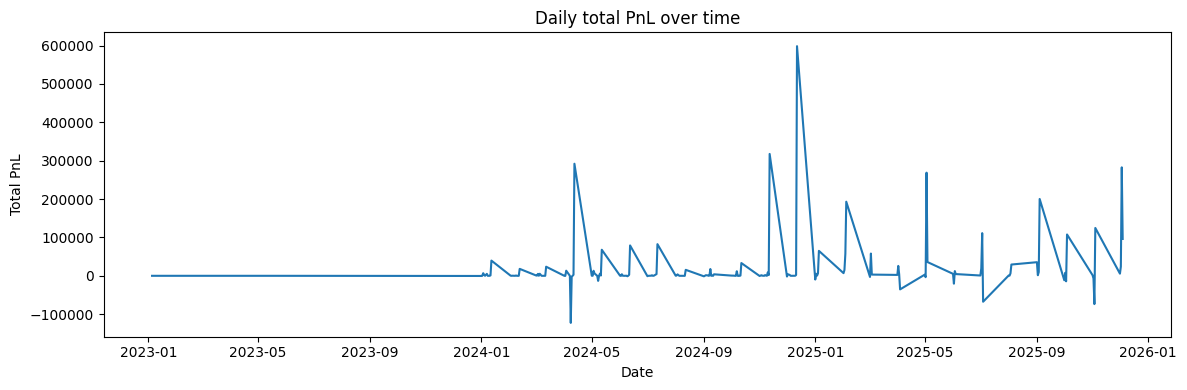

<Figure size 600x400 with 0 Axes>

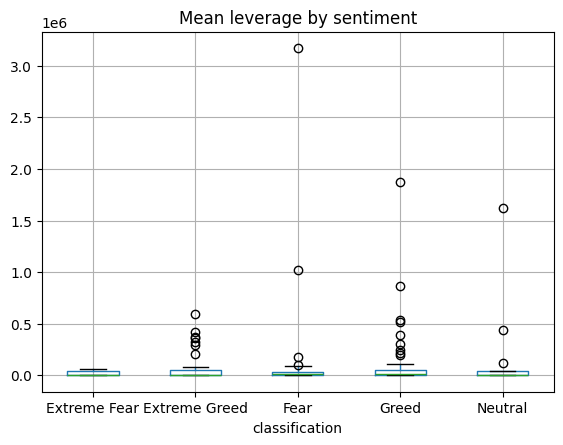

In [33]:
import matplotlib.pyplot as plt

# time series of total_pnl
plt.figure(figsize=(12,4))
plt.plot(merged['date'], merged['total_pnl'])
plt.title('Daily total PnL over time')
plt.xlabel('Date'); plt.ylabel('Total PnL')
plt.tight_layout()
plt.savefig('outputs/daily_total_pnl.png', dpi=150)

# boxplot leverage by sentiment
plt.figure(figsize=(6,4))
merged.boxplot(column='mean_leverage', by='classification')
plt.title('Mean leverage by sentiment'); plt.suptitle('')
plt.savefig('outputs/box_leverage_by_sentiment.png', dpi=150)


In [34]:
# example: make target = next day sign of total_pnl
merged = merged.sort_values('date')
merged['next_total_pnl'] = merged['total_pnl'].shift(-1)
merged['target'] = (merged['next_total_pnl'] > 0).astype(int)

# select features and drop na
features = ['n_trades','total_volume','mean_leverage','total_pnl','win_rate']
df_model = merged.dropna(subset=features+['target']).copy()
X = df_model[features]; y = df_model['target']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test,pred))
print(classification_report(y_test,pred))


Accuracy: 0.5428571428571428
              precision    recall  f1-score   support

           0       0.25      0.07      0.11        14
           1       0.58      0.86      0.69        21

    accuracy                           0.54        35
   macro avg       0.42      0.46      0.40        35
weighted avg       0.45      0.54      0.46        35



In [35]:
daily.to_csv('csv_files/daily_aggregates.csv', index=False)
trades.to_csv('csv_files/clean_trades.csv', index=False)
